## Junior Core Personality Data Set

In [1]:
import pandas as pd

df = pd.read_csv('personality.csv')

df

,AGR1,AGR2,AGR3,AGR4,AGR5,CON1,CON2,CON3,CON4,CON5,...,CON,EXT,INT,NEU,IDV,IVR,LTO,MAS,PD,UAI
0,5,5,7,5,5,7,5,7,7,5,...,6.2,5.0,5.6,3.8,4.75,3.50,4.75,4.00,4.50,3.00
1,4,5,7,5,3,7,5,5,5,3,...,5.0,5.2,5.0,6.4,4.50,3.75,3.75,3.25,4.75,3.00
2,5,5,7,5,7,5,7,5,7,4,...,5.6,5.2,5.6,5.4,5.00,3.25,4.00,4.50,4.25,2.75
3,7,5,5,5,5,7,7,7,7,5,...,6.6,5.2,5.8,5.0,4.25,3.75,5.75,4.25,4.00,3.00
4,7,5,7,7,5,5,4,7,5,4,...,5.0,2.8,5.0,4.4,5.00,4.25,4.50,3.75,3.25,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,7,7,7,7,7,5,7,5,5,4,...,5.2,5.2,5.0,4.8,5.50,4.25,3.50,4.25,3.25,2.75
212,5,5,7,5,5,4,4,4,4,4,...,4.0,3.6,3.8,3.6,4.25,4.50,3.50,3.50,3.75,4.25
213,1,5,7,5,5,4,3,5,4,5,...,4.2,3.8,3.4,3.0,4.50,4.25,3.75,4.00,4.00,3.50
214,5,5,7,7,5,5,5,7,5,7,...,5.8,3.6,7.0,4.4,5.00,4.25,5.00,3.25,4.00,2.50


In [2]:
import plotly.express as px
import sklearn.cluster as cluster
from scipy.spatial import distance as sdist

df_cluster = df[['AGR', 'CON', 'EXT', 'INT', 'NEU', 'IDV', 'IVR', 'LTO', 'MAS', 'PD', 'UAI']]
df_cluster.head()

,AGR,CON,EXT,INT,NEU,IDV,IVR,LTO,MAS,PD,UAI
0,5.4,6.2,5.0,5.6,3.8,4.75,3.50,4.75,4.00,4.50,3.00
1,4.8,5.0,5.2,5.0,6.4,4.50,3.75,3.75,3.25,4.75,3.00
2,5.8,5.6,5.2,5.6,5.4,5.00,3.25,4.00,4.50,4.25,2.75
3,5.4,6.6,5.2,5.8,5.0,4.25,3.75,5.75,4.25,4.00,3.00
4,6.2,5.0,2.8,5.0,4.4,5.00,4.25,4.50,3.75,3.25,3.00


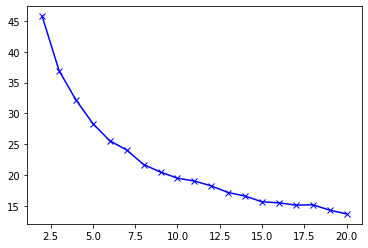

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

# Calinski and Harabasz Criterion

ch_criterion = []
for n in range(2, 21):
  kmeans = KMeans(n, random_state=12345).fit(df_cluster)
  ch_criterion.append(calinski_harabasz_score(df_cluster, labels=kmeans.labels_))

plt.plot(range(2, 21), ch_criterion, 'bx-')
plt.show()

In [4]:
# Silhouette Analyhsis

from sklearn.metrics import silhouette_score

silhouette_avg = []
for n in range(2, 21):
  kmeans = KMeans(n, random_state=12345).fit(df_cluster)
  silhouette_avg.append(silhouette_score(df_cluster, kmeans.labels_))

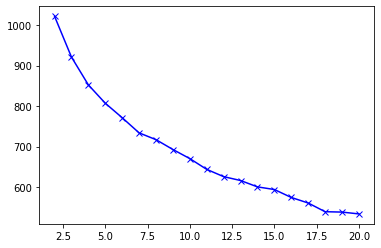

In [5]:
# WCSS (a.k.a. Elbow Method)

ss_distances = []
for n in range (2, 21):
  kmeans = KMeans(n, random_state=12345).fit(df_cluster)
  ss_distances.append(kmeans.inertia_)

plt.plot(range(2, 21), ss_distances, 'bx-')
plt.show()

In [6]:
kmeans = KMeans(2, random_state=12345).fit(df_cluster)

df_wcluster = df_cluster.copy()
df_wcluster['cluster'] = kmeans.predict(df_cluster)
df_wcluster.head()

,AGR,CON,EXT,INT,NEU,IDV,IVR,LTO,MAS,PD,UAI,cluster
0,5.4,6.2,5.0,5.6,3.8,4.75,3.50,4.75,4.00,4.50,3.00,0
1,4.8,5.0,5.2,5.0,6.4,4.50,3.75,3.75,3.25,4.75,3.00,1
2,5.8,5.6,5.2,5.6,5.4,5.00,3.25,4.00,4.50,4.25,2.75,1
3,5.4,6.6,5.2,5.8,5.0,4.25,3.75,5.75,4.25,4.00,3.00,1
4,6.2,5.0,2.8,5.0,4.4,5.00,4.25,4.50,3.75,3.25,3.00,0


In [7]:
output_df = pd.DataFrame({'C0_means':df_wcluster[df_wcluster.cluster==0].mean(), 
                          'C1_means':df_wcluster[df_wcluster.cluster==1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.sort_values(by=['diff'], ascending=False).head(11)

,C0_means,C1_means,diff
EXT,4.082353,5.317544,1.235191
NEU,3.800000,4.910526,1.110526
cluster,0.000000,1.000000,1.000000
INT,4.596078,5.387719,0.791641
AGR,5.556863,6.329825,0.772962
UAI,3.198529,2.971491,0.227038
LTO,4.546569,4.418860,0.127709
CON,5.470588,5.528070,0.057482
IDV,4.433824,4.486842,0.053019
PD,3.882353,3.932018,0.049665


In [8]:
import plotly.express as px

fig = px.scatter_3d(df_wcluster, x='EXT', y='NEU', z='AGR', color='cluster')
fig.show()

## Insurance Data Set

In [9]:
from sklearn.preprocessing import MinMaxScaler

df_cluster = pd.read_csv('insurance.csv')

df_cluster = pd.get_dummies(df_cluster, columns=['sex', 'region', 'smoker'], drop_first=True)
df_cluster = pd.DataFrame(MinMaxScaler().fit_transform(df_cluster), columns=df_cluster.columns)
df_cluster.head()

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,0.021739,0.321227,0.0,0.251611,0.0,0.0,0.0,1.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,1.0,0.0,0.0,0.0


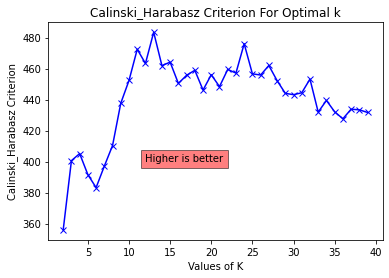

In [10]:
# Calinski and Harabasz Criterion
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

ch_criterion = []
for n in range(2, 40):
  kmeans = cluster.KMeans(n_clusters=n, random_state=12345).fit(df_cluster)
  ch_criterion.append(calinski_harabasz_score(df_cluster, labels=kmeans.labels_))

plt.plot(range(2, 40), ch_criterion, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Calinski_Harabasz Criterion') 
plt.title('Calinski_Harabasz Criterion For Optimal k')
plt.text(12, 400, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

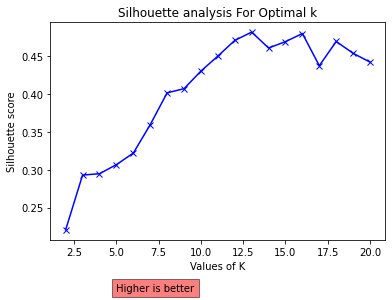

In [11]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score

silhouette_avg = []
for num_clusters in range(2, 21):
 kmeans = cluster.KMeans(n_clusters=num_clusters).fit(df_cluster)
 silhouette_avg.append(silhouette_score(df_cluster, kmeans.labels_))

plt.plot(range(2, 21), silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.text(5, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

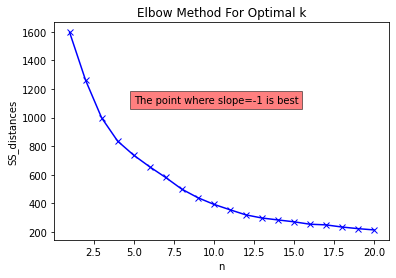

In [12]:
# WCSS: Elbow Method

SS_distances = []
for k in range(1,21):
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    SS_distances.append(km.inertia_)
    
plt.plot(range(1,21), SS_distances, 'bx-')
plt.xlabel('n')
plt.ylabel('SS_distances')
plt.title('Elbow Method For Optimal k')
plt.text(5, 1100, 'The point where slope=-1 is best', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [16]:
output_df = pd.DataFrame(columns=['C0_mean', 'C1_mean'])

for col in df_wcluster:
  if col != 'cluster':
    output_df.loc[col] = [df_wcluster[df_wcluster.cluster == 0][col].mean(), df_wcluster[df_wcluster.cluster == 1][col].mean()]

output_df['diff'] = abs(output_df['C0_mean'] - output_df['C1_mean'])
output_df.sort_values(by=['diff'], ascending=False).head(11)

AttributeError: 'DataFrame' object has no attribute 'cluster'

## Heirarchical Clustering

In [22]:
df = pd.read_csv('insurance.csv')

In [29]:
import gower
from sklearn.cluster import AgglomerativeClustering

distance_matrix = gower.gower_matrix(df)
agg = AgglomerativeClustering(affinity='precomputed', linkage='average').fit(distance_matrix)

#make a cluster column
df_wcluster = df.copy()
df_wcluster['cluster'] = agg.labels_
print(df_wcluster.cluster.value_counts())
df_wcluster.head()

1    1064
0     274
Name: cluster, dtype: int64


,age,sex,bmi,children,smoker,region,charges,cluster
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [28]:
#for this to work, we need to first dummy code the data set and then run this cell
output_df = pd.DataFrame({'C0_means':df_wcluster[df_wcluster.cluster==0].mean(), 
                          'C1_means':df_wcluster[df_wcluster.cluster==1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.sort_values(by=['diff'], ascending=False).head(11)

C:\Users\Acer\AppData\Local\Temp/ipykernel_16684/238124405.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Acer\AppData\Local\Temp/ipykernel_16684/238124405.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,C0_means,C1_means,diff
charges,32050.231832,8434.268298,23615.963534
cluster,0.000000,1.000000,1.000000
age,38.514599,39.385338,0.870740
bmi,30.708449,30.651795,0.056654
children,1.113139,1.090226,0.022913
